In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#
%matplotlib inline

In [ ]:
# io
city_data = "resources/city_data.csv"
city_data_df = pd.read_csv(city_data)
ride_data = "resources/ride_data.csv" 
ride_data_df = pd.read_csv(ride_data)
#
city_data_df, ride_data_df

In [ ]:
# explore data in pandas
city_data_df.count(), ride_data_df.count()

In [ ]:
# are there nulls?
city_data_df.isnull().sum(), ride_data_df.isnull().sum()

In [ ]:
# data types in each files
city_data_df.dtypes, ride_data_df.dtypes

In [ ]:
# unique data in city data
print(city_data_df["type"].unique())
print(f"no. of Urban\t{sum(city_data_df['type'] == 'Urban')}")
print(f"no. of Rural\t{sum(city_data_df['type'] == 'Rural')}")
print(f"no. of Suburban\t{sum(city_data_df['type'] == 'Suburban')}")


In [ ]:
pyber_data_df = pd.merge(city_data_df, ride_data_df, how="left", on=["city", "city"])
pyber_data_df

In [ ]:
# create the urban city dataframe
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
# print(suburban_cities_df.head(10))
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
print(rural_cities_df.head(10))
rural_cities_df.to_csv("resources/rural_cities.csv")
# there is a problem here. me or data, the first city is South Jennifer

In [71]:
# number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(urban_cities_df["city"]).count()["ride_id"]
print(urban_ride_count.head())
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
print(suburban_ride_count.head())
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
print(rural_ride_count.head())

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64
city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [72]:
# get average fare for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
print(urban_avg_fare.head())
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
print(suburban_avg_fare.head())
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
print(rural_avg_fare.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [73]:
# get the average number of city drivers
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
print(urban_driver_count.head())
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
print(suburban_driver_count)
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
print(rural_driver_count)

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64
city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.

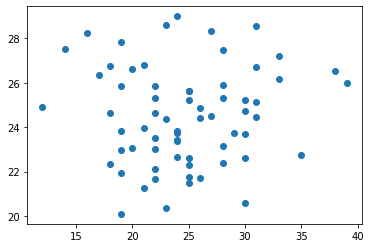

In [76]:
import matplotlib.pyplot as plt
# scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare)

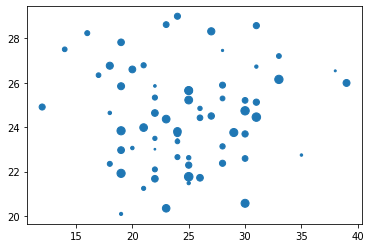

In [77]:
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count)

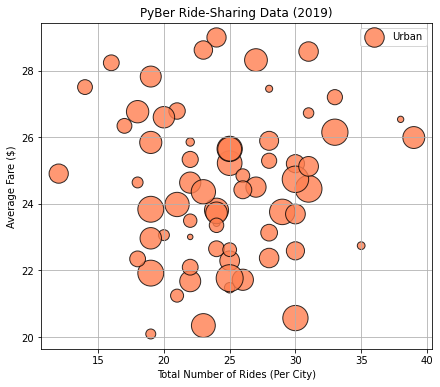

In [88]:
# scatter plot for urban cities
plt.figure(figsize=(7,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10 * urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

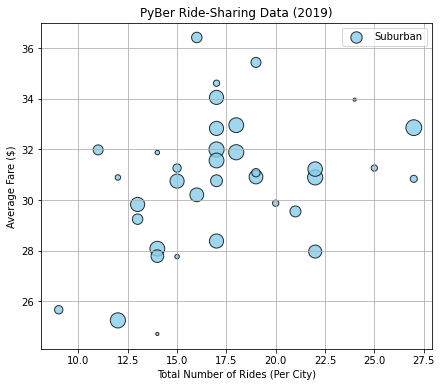

In [89]:
# scatter plot for suburvan cities
plt.figure(figsize=(7,6))
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

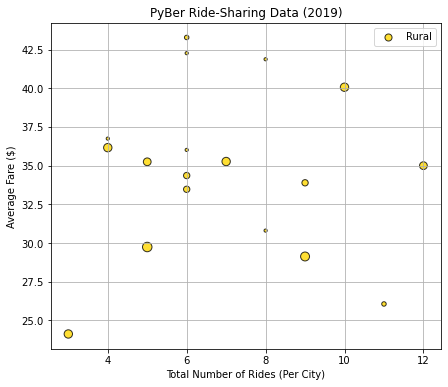

In [90]:
# Build the scatter plots for rural cities.
plt.figure(figsize=(7,6))
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

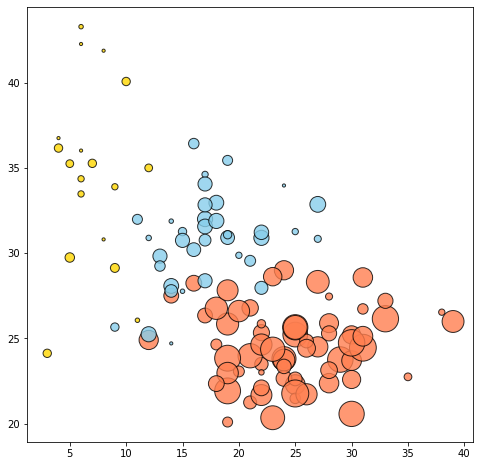

In [94]:
# scatter plot for each type of city
plt.figure(figsize=(8,8))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")


# Show the plot
plt.show()

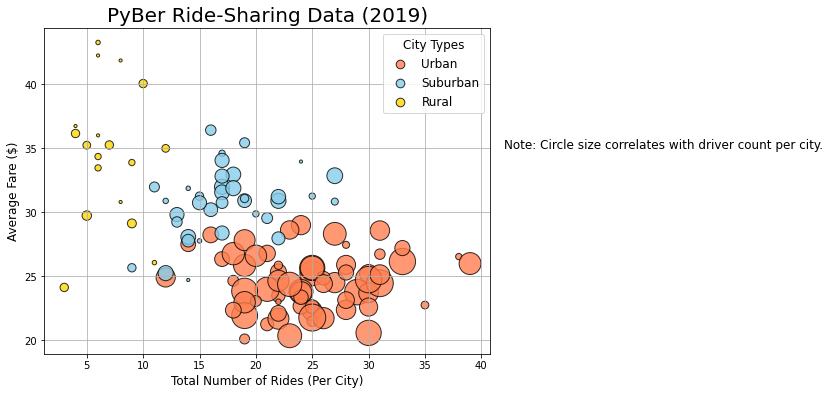

In [106]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(8, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()